# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta, datetime
import re
from IPython.display import clear_output
import requests
import json

In [2]:
def print_corona_virus():
    print("""\
⠀⠀⠀   ⠀⠀⠀⠀⠀⠀ ⠀⠀⠀ ⢀⣠⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀
              ⣶⡟⢉⠁⠈⡻⠘⠏⠀⠹⢛⣷⠄
    ⠀⠀⠀⠀⣰⡞⢿⡄⠀⢻⡴⣇⣀⣷⣴⢄⢀⡖⡾⠁⢀⣼⢛⣦⠀
    ⠀⣠⣄⠈⠙⢦⣿⣶⠞⠋⠉⠁⣀⣄⡀⠉⠙⠻⢦⣾⣵⠟⠉⢠⣄⠀
    ⢰⣯⣙⠷⣄⡴⠋⣤⣤⣤⠀⢸⡏⢉⣿⠀⣠⡤⣤⡘⢷⣤⡴⣛⣹⣧⠀
⠀ ⠀⢀⣄⠀⠉⢛⡿⠁⠘⣧⣀⣼⠃⠀⠙⠛⠁⠀⢿⣄⣸⠇⠀⢹⡟⠉⠁⢀⣄⠀
    ⡾⡙⣛⣳⣾⠁⠀⡀⣀⠉⠀⠀⠀⣀⣀⠀⠀⠀⠉⢁⡀⡀⠀⢿⣶⣛⣋⣻⠀ ⠀
    ⠉⠈⠉⠈⡹⠀⠸⠁⠙⣷⠀⠀⢸⡏⠉⣷⠀⠀⢰⠉⠈⣣⠀⠸⡉⠉⠉⠉⠀ ⠀
    ⣿⠛⣛⣻⣿⠀⠈⠛⠙⠁⠀⠀⠈⠛⠛⠁⠀⠀⠀⠙⠛⠉⠀⣼⣽⣛⡛⣹⠀ ⠀
    ⠘⠟⠉⠁⣘⣧⠀⢀⡶⠛⢶⡂⠀⢀⣀⠀⠀⣴⠟⢳⡄⠀⢰⣏⠀⠉⠙⠛⠀ ⠀⠀
     ⢰⡶⢛⣭⠟⢧⡈⠷⠶⠾⠁⢰⡏⠙⣷⠀⠻⢦⠾⢃⣴⠿⢯⣛⢳⡶⠀⠀ ⠀⠀⠀
       ⠻⠟⠁⢀⡴⣿⢶⣄⡀⠀⠈⠛⠚⠋⠀⢀⣠⡴⣾⢷⣄⠀⠹⠟⠁⠀⠀ ⠀⠀⠀⠀⠀
          ⢺⣏⣴⠏⠀⣸⠟⠝⠓⠶⠶⠖⠛⠛⣯⠀⠘⢷⣙⡿⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀
            ⠈⠉⠀⣶⣏⣬⠁⠀⣥⢠⠆⠀⣰⣘⣷⠄⠈⠉⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
                  ⠉⠉⠀⠘⠳⠾⠛⠀⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀

                    """)
    

# Extract data from whatsapp messages files

In [3]:
""" This function reads the contents of a whatsapp group chat export file (.txt) and creates a table.
The messages formats must be as it appears in the regex.
"""
def create_drives_table(file_path, show_unvalid_rows=False):
    print("Reading Whatsapp chat file.")
    # Define the table format
    drives = pd.DataFrame({"report_date":[], 
                           "report_time":[],
                           "line/train":[],
                           "board_time":[],
                           "destination":[],
                           "source":[]})
    
    # Read whatsapp file and extract the necessary data from each line
    print("Parsing data")
    with open(file_path, "r", encoding="utf8") as file:
        lines = file.readlines()
        num_of_lines = len(lines)
        count = 0
        for line in lines:
            matches = re.findall(r"(\d+/\d+/\d+), (\d{2}:\d{2}) - .+:\s+(.+)\s+\u05DE(.+[^\s])\s+\u05DC(.+[^\s])\s+\u05D1\u05E9\u05E2\u05D4\s+(\d+:\d+)", line)
            try:
                drives = drives.append({"report_date":pd.to_datetime(matches[0][0]), 
                                        "report_time":matches[0][1],
                                        "line/train":matches[0][2],
                                        "source":matches[0][3],
                                        "destination":matches[0][4],
                                        "board_time":matches[0][5].zfill(5)
                                       },
                                        ignore_index=True)
            except:
                if(show_unvalid_rows):
                    print("\nAn exception occurred", line)
                    
            count+=1
            if(not show_unvalid_rows):
                clear_output(wait=True)
                print(round(((count)/num_of_lines)*100,2), "%", sep='')
            
    # convert string time to time
    drives["board_time"] = pd.to_datetime(drives["board_time"], format='%H:%M' )
    drives["line/train"].replace({"רכבת-קלה":"רכבת קלה"}, inplace=True)
    print("\nFinished creating Drives table.")
    return (drives)

### Send request to the api

In [4]:
# Prepare packet and send request to the api
def send_request_to_api(payload):
    print("\nSending request.")
    header = """User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0\nContent-Type: application/json"""
    header = dict(line.split(": ") for line in header.split("\n"))
    response = requests.post("https://coronaupdates.health.gov.il/api/map/getPublicTransport", headers=header, data=payload)
    print("\nResponse received:", response.status_code, response.reason)
    return (response)

# Retrieve the data from the response and create a table
def create_table_from_api_response(response):
    #parse the response
    official_data = json.loads(response.text)
    official_data = pd.DataFrame(official_data)
    official_data = official_data[["lineNumber", 
                                   'datePlaceFrom', 
                                   'timePlaceFrom',
                                   'timePlaceTo',
                                   'fromCityName',
                                   'fromStationDesc',
                                   'toCityName',
                                   'toStationDesc',
                                   'companyDesc']].copy()
    
    #convert time strings to time
    official_data["datePlaceFrom"] = pd.to_datetime(official_data["datePlaceFrom"])
    official_data["timePlaceTo"] = pd.to_datetime(official_data["timePlaceTo"], format='%H:%M:%S' )
    official_data["timePlaceFrom"] = pd.to_datetime(official_data["timePlaceFrom"], format='%H:%M:%S' )
    print("\nCreated table from response.")
    
    #apparently trains dont have a line number so they fall during the merge phase
    official_data.loc[official_data["companyDesc"] == 'רכבת ישראל', "lineNumber"] = "רכבת"
    return (official_data)

# Merge the two tables

In [5]:
# Merge the official data and the drives data
def create_overlap_table(official_data, drives):
    joined_tables = official_data.merge(drives, how='inner', left_on=["datePlaceFrom","lineNumber"], right_on=["report_date", "line/train"])
    joined_tables = joined_tables[["lineNumber",
                                   "companyDesc",
                                   "report_date",
                                   "board_time",
                                   "timePlaceFrom",
                                   "timePlaceTo",
                                   "source",
                                   "destination",
                                   "fromCityName",
                                   "fromStationDesc",
                                   "toCityName",
                                   "toStationDesc"
                                  ]].copy()
    print("\nCreated overlap table.")
    return (joined_tables)

# Filter Data

In [6]:
# filtering the data to drives occuring within the range of x hours from the contaminated drive
def filter_overlap_table(hours, overlap_table, print_result=True):
    potential_contamination = overlap_table[(pd.to_datetime(overlap_table["board_time"]).dt.time <= 
                                             pd.to_datetime(overlap_table["timePlaceTo"]).dt.time) & 
                                            (pd.to_datetime(overlap_table["board_time"]).dt.time >= 
                                             pd.to_datetime(overlap_table["timePlaceTo"] - pd.Timedelta(hours=hours)).dt.time)
                                           ]
    if(print_result):
        if(len(potential_contamination) > 0):
            print("\n", "#"*100)
            print("Found drives with contamination potential!")
            display(potential_contamination)
            print("#"*100)
            print_corona_virus()
        else:
            print("\nAll Good :)\n")
    return(potential_contamination)

# Visualize Data

In [7]:
def print_trips_graph(drives):
    #creating a barplot to visualize the data
    trip_count_by_line = drives['line/train'].value_counts()
    trip_count_by_line = pd.DataFrame({"Line":trip_count_by_line.index, "Trips":trip_count_by_line.values})
    
    sns.set(rc={'figure.figsize':(10,5)})
    ax = sns.barplot(y="Trips", x="Line", data=trip_count_by_line, palette="Blues_d")
    
    # label each bar in barplot
    for p in ax.patches:
        # get the height of each bar
        height = p.get_height()
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height+1, # y-coordinate position of data label, padded 100 above bar
        s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center
        
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()

# Main Section

100.0%

Finished creating Drives table.

Payload is: {"fromDate": "2020-12-30T14:44:03.765520Z", "toDate": "2021-01-20T14:44:03.765520Z"}

Sending request.

Response received: 200 OK

Created table from response.

Created overlap table.

 ####################################################################################################
Found drives with contamination potential!


,lineNumber,companyDesc,report_date,board_time,timePlaceFrom,timePlaceTo,source,destination,fromCityName,fromStationDesc,toCityName,toStationDesc
16,51,דן,2021-01-10,1900-01-01 16:51:00,1900-01-01 17:00:00,1900-01-01 17:30:00,רשי,סבידור,רמת גן,זבוטנסקי ליד תחנת משטרה,תל אביב - יפו,יצחק שדה המסגר
19,70,קווים,2021-01-10,1900-01-01 08:34:00,1900-01-01 09:10:00,1900-01-01 10:20:00,סבידור,רשי,זכרון יעקב,תחנה מרכזית,חדרה,תחנה מרכזית
20,70,קווים,2021-01-10,1900-01-01 08:34:00,1900-01-01 08:15:00,1900-01-01 09:05:00,סבידור,רשי,חדרה,תחנה מרכזית,זכרון יעקב,תחנה מרכזית
25,70,דן,2021-01-07,1900-01-01 09:17:00,1900-01-01 09:00:00,1900-01-01 09:21:00,רשי,סבידור,"""אזור רמת גן של""""ש""",מחלף גהה,תל אביב - יפו,תל השומר
28,70,דן,2021-01-06,1900-01-01 07:42:00,1900-01-01 08:20:00,1900-01-01 08:30:00,סבידור,רשי,בני ברק,גשר גבעת שמואל,בני ברק,דב גרונר


####################################################################################################
⠀⠀⠀   ⠀⠀⠀⠀⠀⠀ ⠀⠀⠀ ⢀⣠⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀
              ⣶⡟⢉⠁⠈⡻⠘⠏⠀⠹⢛⣷⠄
    ⠀⠀⠀⠀⣰⡞⢿⡄⠀⢻⡴⣇⣀⣷⣴⢄⢀⡖⡾⠁⢀⣼⢛⣦⠀
    ⠀⣠⣄⠈⠙⢦⣿⣶⠞⠋⠉⠁⣀⣄⡀⠉⠙⠻⢦⣾⣵⠟⠉⢠⣄⠀
    ⢰⣯⣙⠷⣄⡴⠋⣤⣤⣤⠀⢸⡏⢉⣿⠀⣠⡤⣤⡘⢷⣤⡴⣛⣹⣧⠀
⠀ ⠀⢀⣄⠀⠉⢛⡿⠁⠘⣧⣀⣼⠃⠀⠙⠛⠁⠀⢿⣄⣸⠇⠀⢹⡟⠉⠁⢀⣄⠀
    ⡾⡙⣛⣳⣾⠁⠀⡀⣀⠉⠀⠀⠀⣀⣀⠀⠀⠀⠉⢁⡀⡀⠀⢿⣶⣛⣋⣻⠀ ⠀
    ⠉⠈⠉⠈⡹⠀⠸⠁⠙⣷⠀⠀⢸⡏⠉⣷⠀⠀⢰⠉⠈⣣⠀⠸⡉⠉⠉⠉⠀ ⠀
    ⣿⠛⣛⣻⣿⠀⠈⠛⠙⠁⠀⠀⠈⠛⠛⠁⠀⠀⠀⠙⠛⠉⠀⣼⣽⣛⡛⣹⠀ ⠀
    ⠘⠟⠉⠁⣘⣧⠀⢀⡶⠛⢶⡂⠀⢀⣀⠀⠀⣴⠟⢳⡄⠀⢰⣏⠀⠉⠙⠛⠀ ⠀⠀
     ⢰⡶⢛⣭⠟⢧⡈⠷⠶⠾⠁⢰⡏⠙⣷⠀⠻⢦⠾⢃⣴⠿⢯⣛⢳⡶⠀⠀ ⠀⠀⠀
       ⠻⠟⠁⢀⡴⣿⢶⣄⡀⠀⠈⠛⠚⠋⠀⢀⣠⡴⣾⢷⣄⠀⠹⠟⠁⠀⠀ ⠀⠀⠀⠀⠀
          ⢺⣏⣴⠏⠀⣸⠟⠝⠓⠶⠶⠖⠛⠛⣯⠀⠘⢷⣙⡿⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀
            ⠈⠉⠀⣶⣏⣬⠁⠀⣥⢠⠆⠀⣰⣘⣷⠄⠈⠉⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
                  ⠉⠉⠀⠘⠳⠾⠛⠀⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀

                    


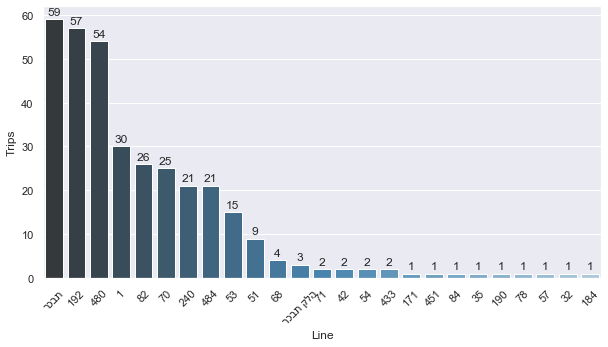

In [8]:
def main():
    drives = create_drives_table(file_path=r"drives.txt", show_unvalid_rows=False)
    
    payload = {"fromDate" : (datetime.utcnow() - timedelta(weeks=3)).isoformat() +'Z',
               "toDate" : datetime.utcnow().isoformat() + 'Z'
          }
    payload = json.dumps(payload)
    print("\nPayload is:",payload)
    response = send_request_to_api(payload=payload)
    
    if(response.status_code != 200):
        print("\nRequest was unsuccessful")
    else:
        official_data = create_table_from_api_response(response=response)
        overlap_table = create_overlap_table(official_data=official_data, drives=drives)
        filter_overlap_table(hours=2, overlap_table=overlap_table, print_result=True)
    
    print_trips_graph(drives=drives)

if __name__ == "__main__":
    main()